In [1]:
#from QuantLib import *
#import latex
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
#import tikzplotlib as tplt
#import pylab as pl
#%matplotlib notebook

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
    'text.usetex' : True,
    "font.family": "Times New Roman",
    "font.monospace": 'Computer Modern'
    ,"font.size": 18.5
    ,"axes.labelsize":22.5
    ,"figure.figsize":(10,5)
    ,'figure.dpi': 400
})

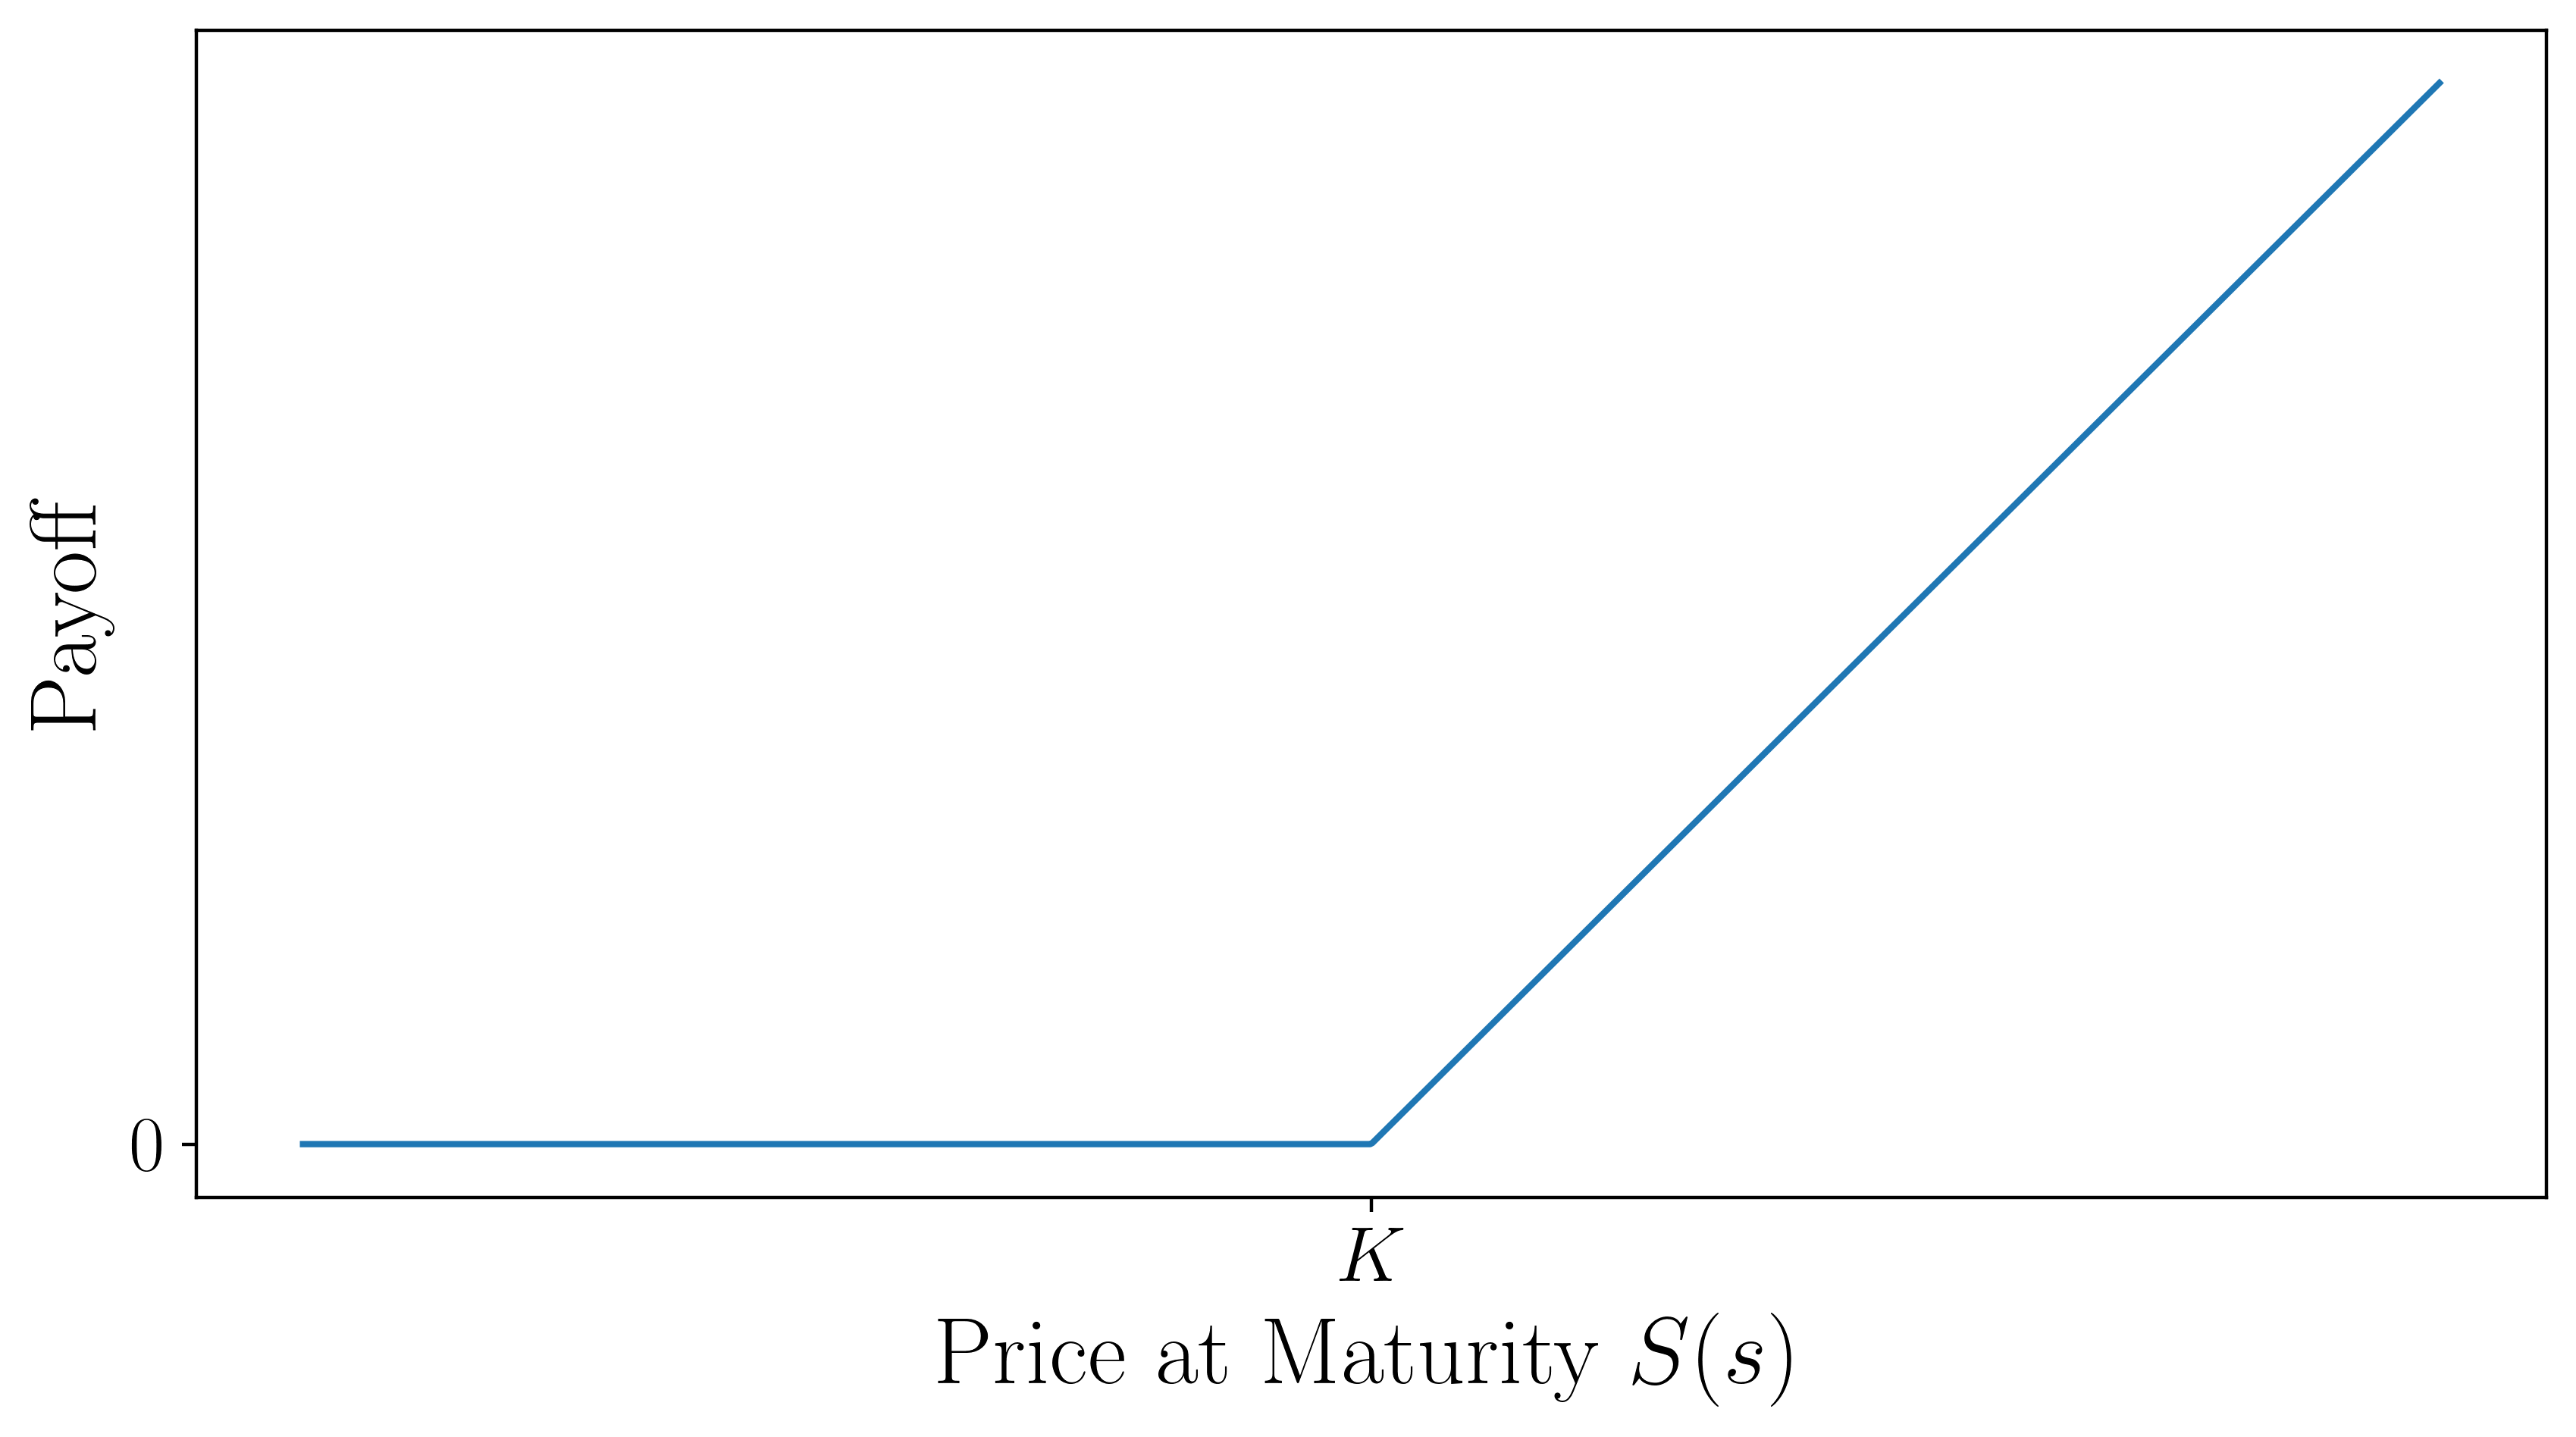

In [3]:
def call(S,K):
    #S is list
    return [max(s-K,0) for s in S]

x = np.linspace(0,5,1000)
K = 2.5
figure = plt.figure(figsize=(10,5), dpi=400)
plt.plot(x,call(x,K))
plt.xticks([K],['$K$'])
plt.yticks([0],['$0$'])
plt.xlabel('Price at Maturity $S(s)$')
plt.ylabel('Payoff')
#plt.title('Payoff of a European Call Option in function of the Price at Maturity', size=20)
plt.savefig("call_payoff", bbox_inches='tight', pad_inches=0.01)
plt.show()


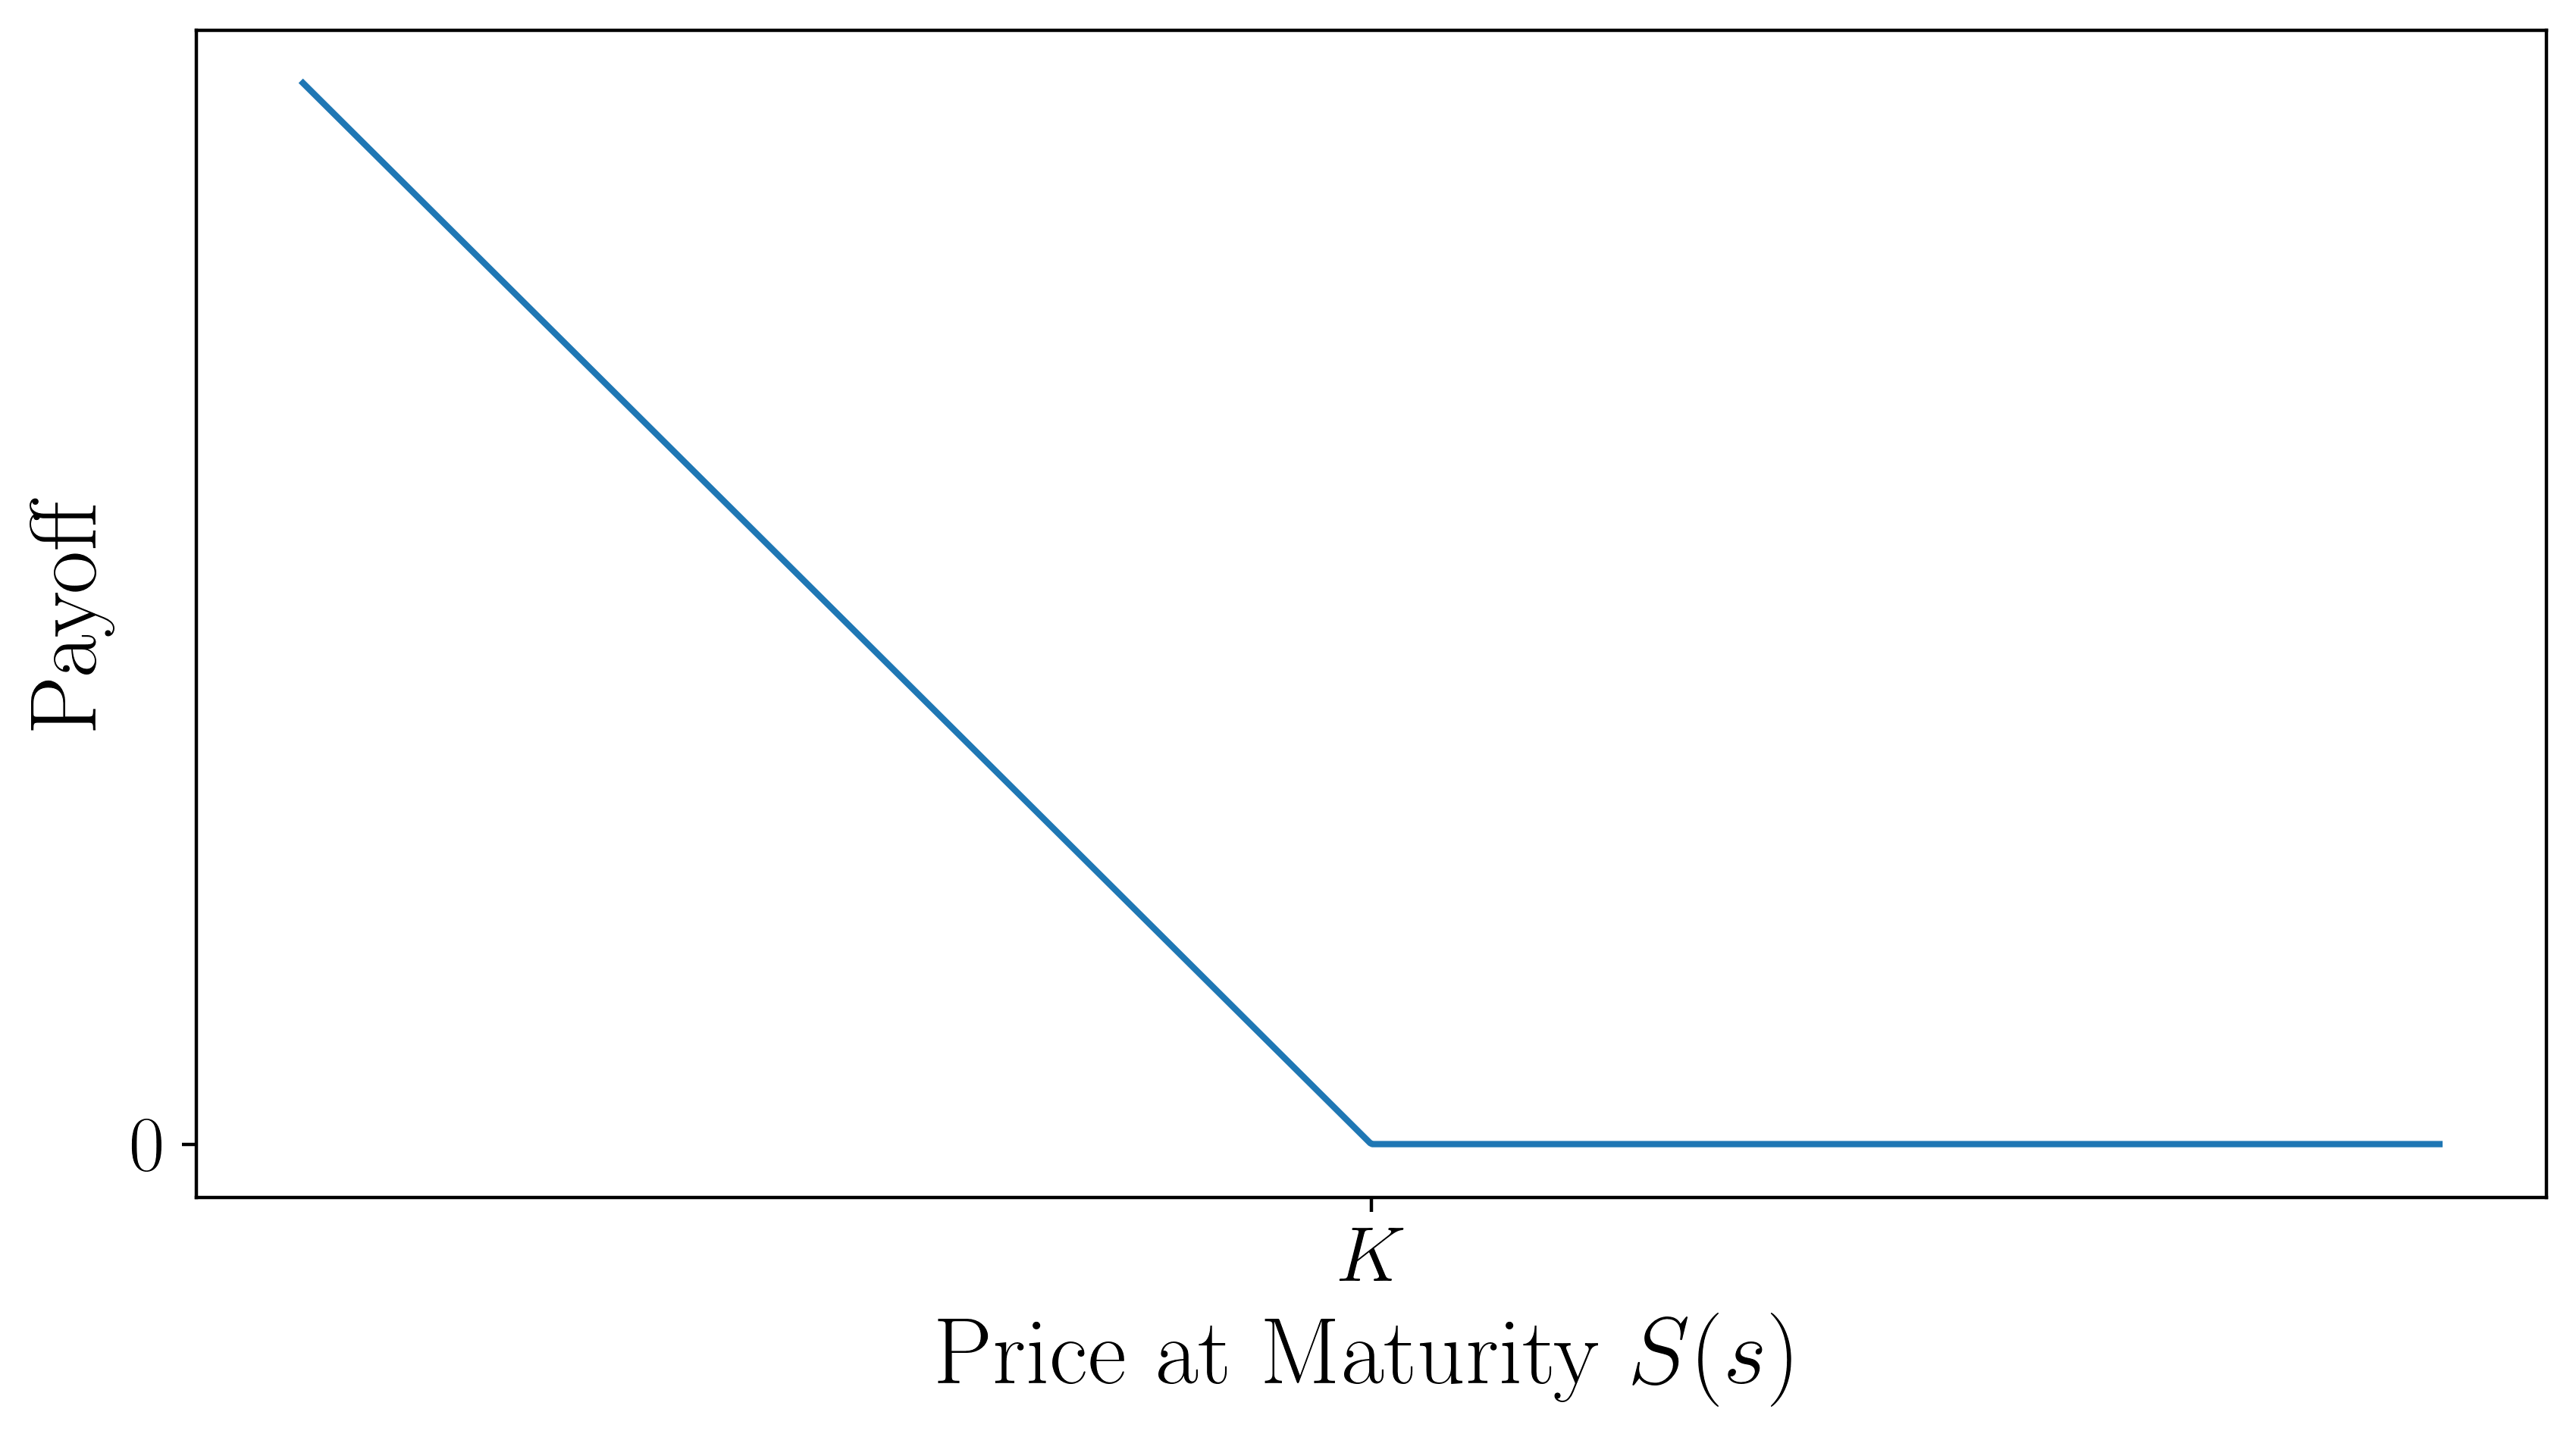

In [4]:
def put(S,K):
    #S is list
    return [max(K-s,0) for s in S]

x = np.linspace(0,5,1000)
K = 2.5
figure = plt.figure(figsize=(10,5), dpi=400)
#plt.margins(0)
plt.plot(x,put(x,K))
plt.xticks([K],['$K$'])
plt.yticks([0],['$0$'])
plt.xlabel('Price at Maturity $S(s)$')
plt.ylabel('Payoff')
#plt.title('Payoff of a European Put Option in function of the Price at Maturity', size=20)

# Adjust the figure size and aspect ratio
#fig = plt.gcf()  # Get the current figure
#fig.set_size_inches(10, 5)  # Set the size in inches (width, height)

# Remove padding and margins
#plt.margins(0)
#plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

plt.savefig("put_payoff", bbox_inches='tight', pad_inches=0.01)
plt.show()

In [5]:
def black_scholes_call(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

C:\Users\dietd\AppData\Local\Temp\ipykernel_36224\225991473.py:2: RuntimeWarning: divide by zero encountered in log
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


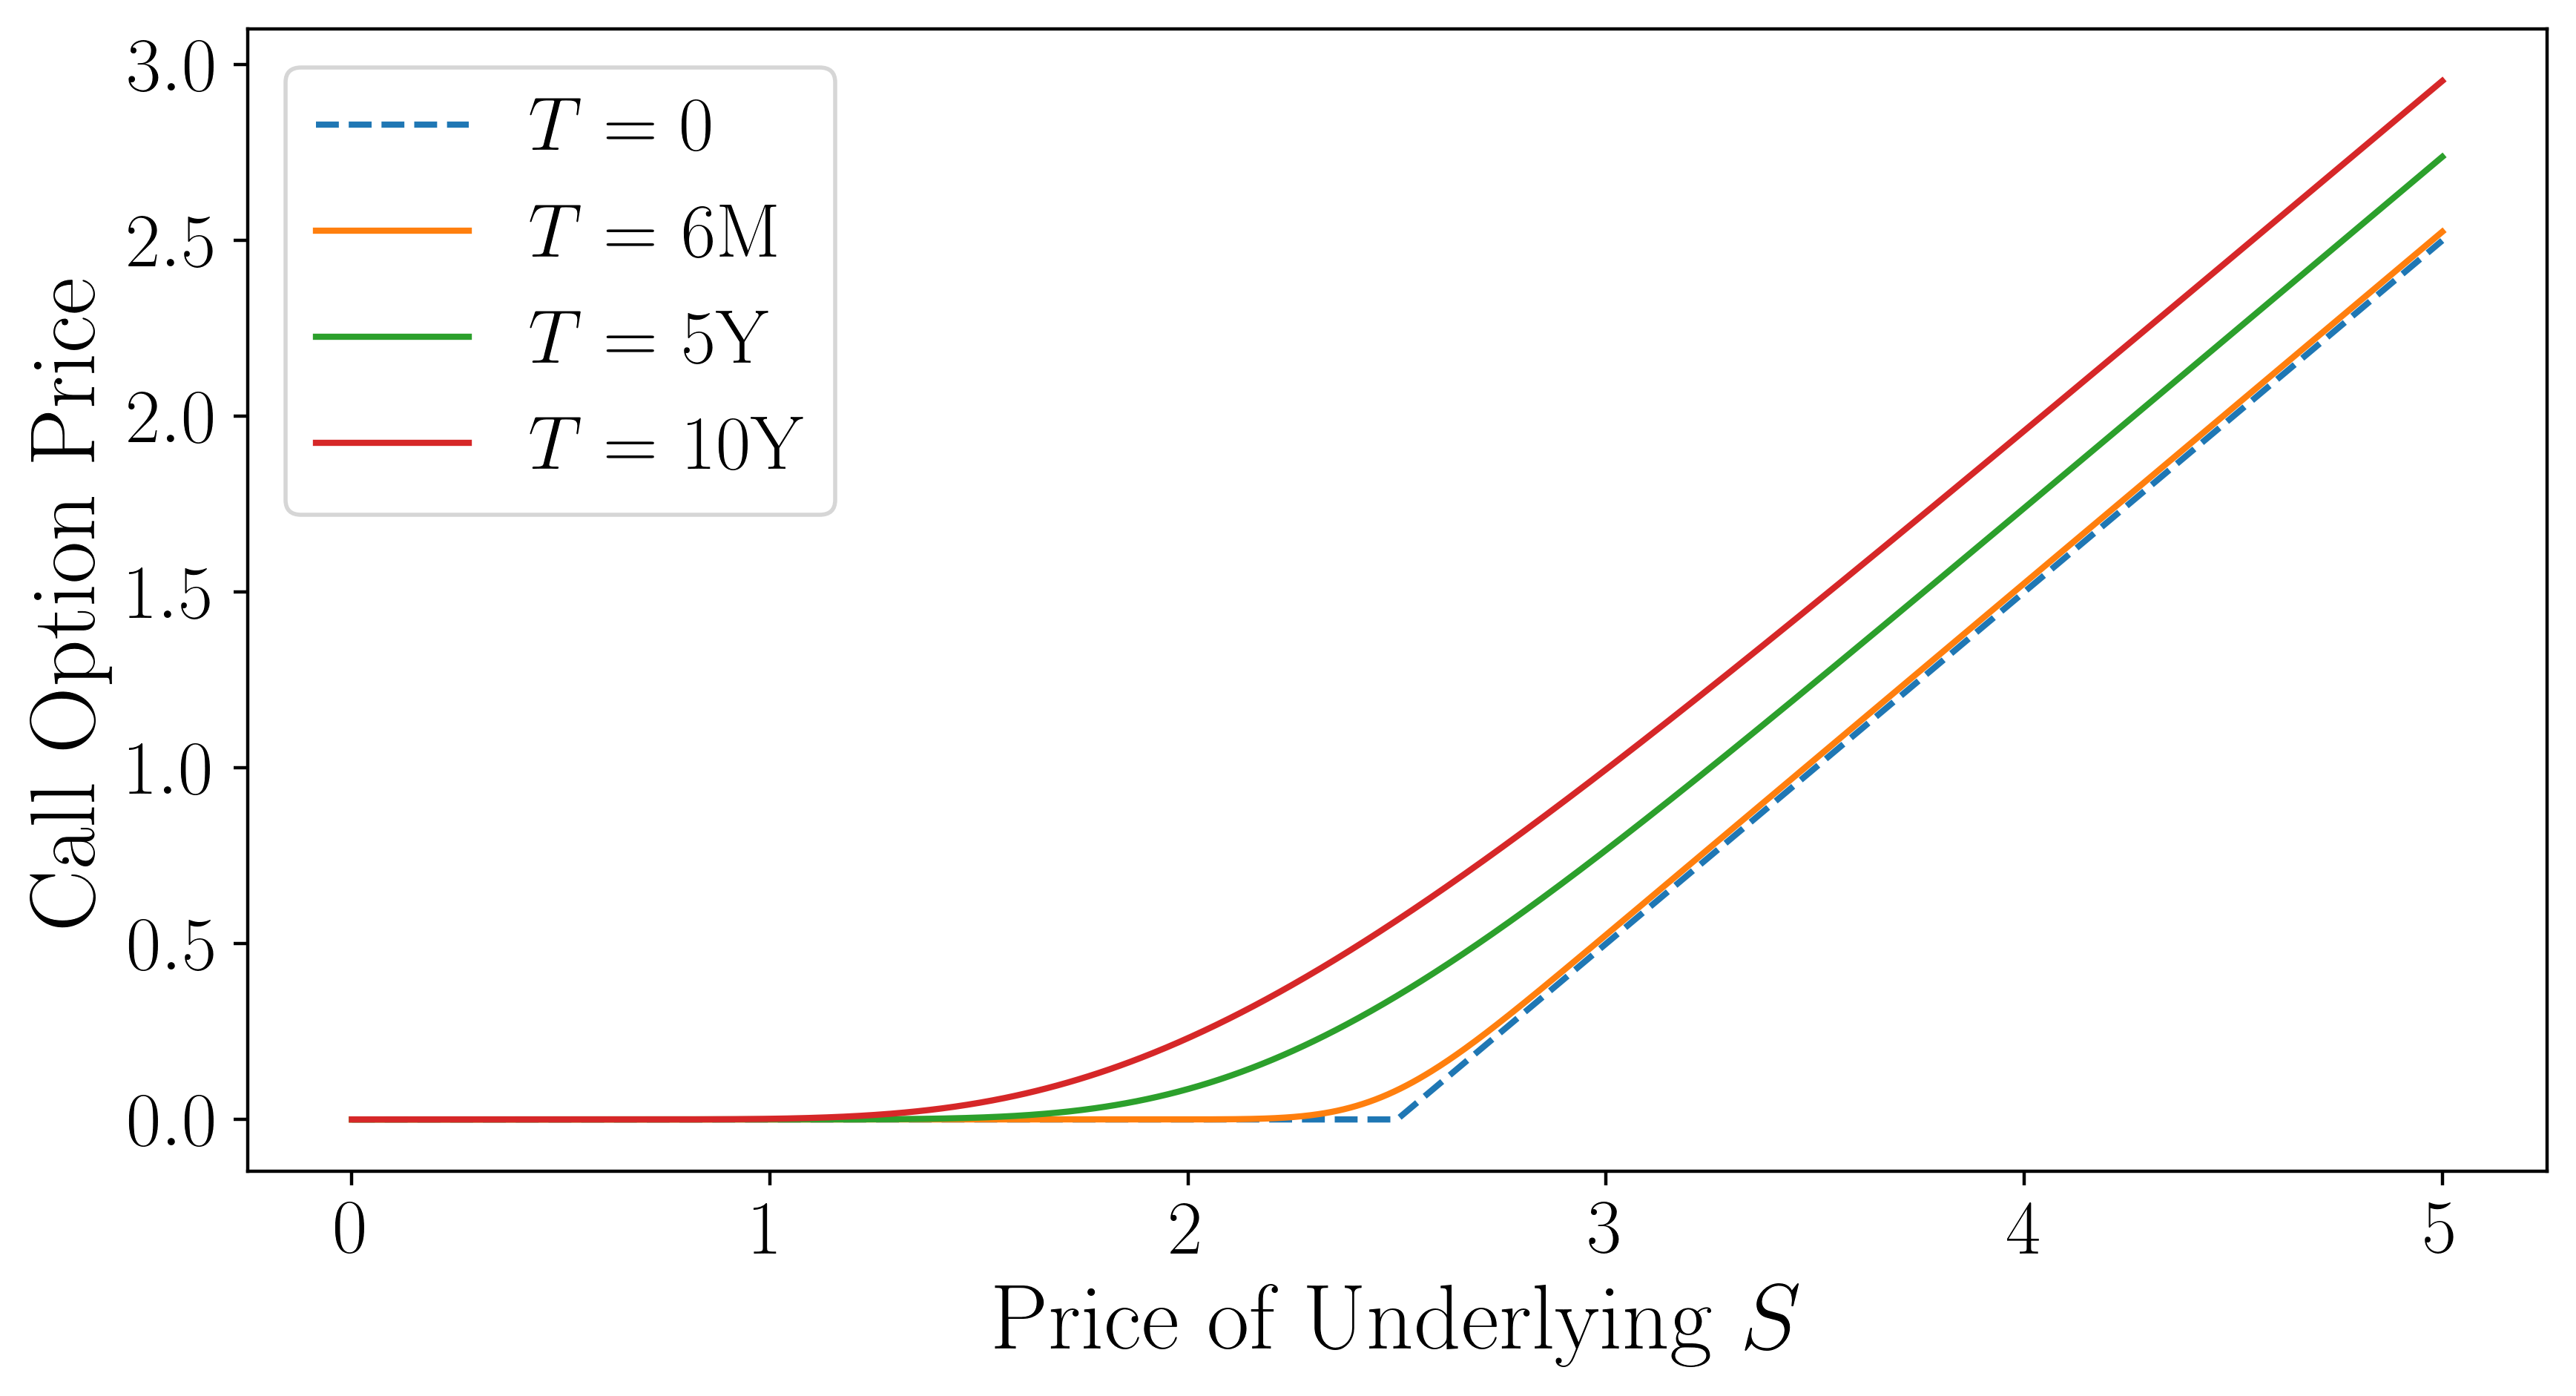

In [8]:
time = [6/12, 5, 10]
price = [[black_scholes_call(S,K,0.02,t,0.1) for S in x] for t in time]
fig = plt.figure(figsize=(10,5), dpi=400)
plt.plot(x,call(x,K),'--', label='$T=0$')
for i in range(len(time)):
    if time[i]<1:
        plt.plot(x, price[i], label='$T=$ '+str(round(time[i]*12))+'M')
    else:
        plt.plot(x, price[i], label='$T=$ '+str(time[i])+'Y')

plt.legend()
plt.xlabel('Price of Underlying $S$')
plt.ylabel('Call Option Price')
plt.savefig("call_prices", bbox_inches='tight', pad_inches=0.01)
plt.show()

C:\Users\dietd\AppData\Local\Temp\ipykernel_9748\225991473.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
C:\Users\dietd\AppData\Local\Temp\ipykernel_9748\225991473.py:2: RuntimeWarning: invalid value encountered in double_scalars
  d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))


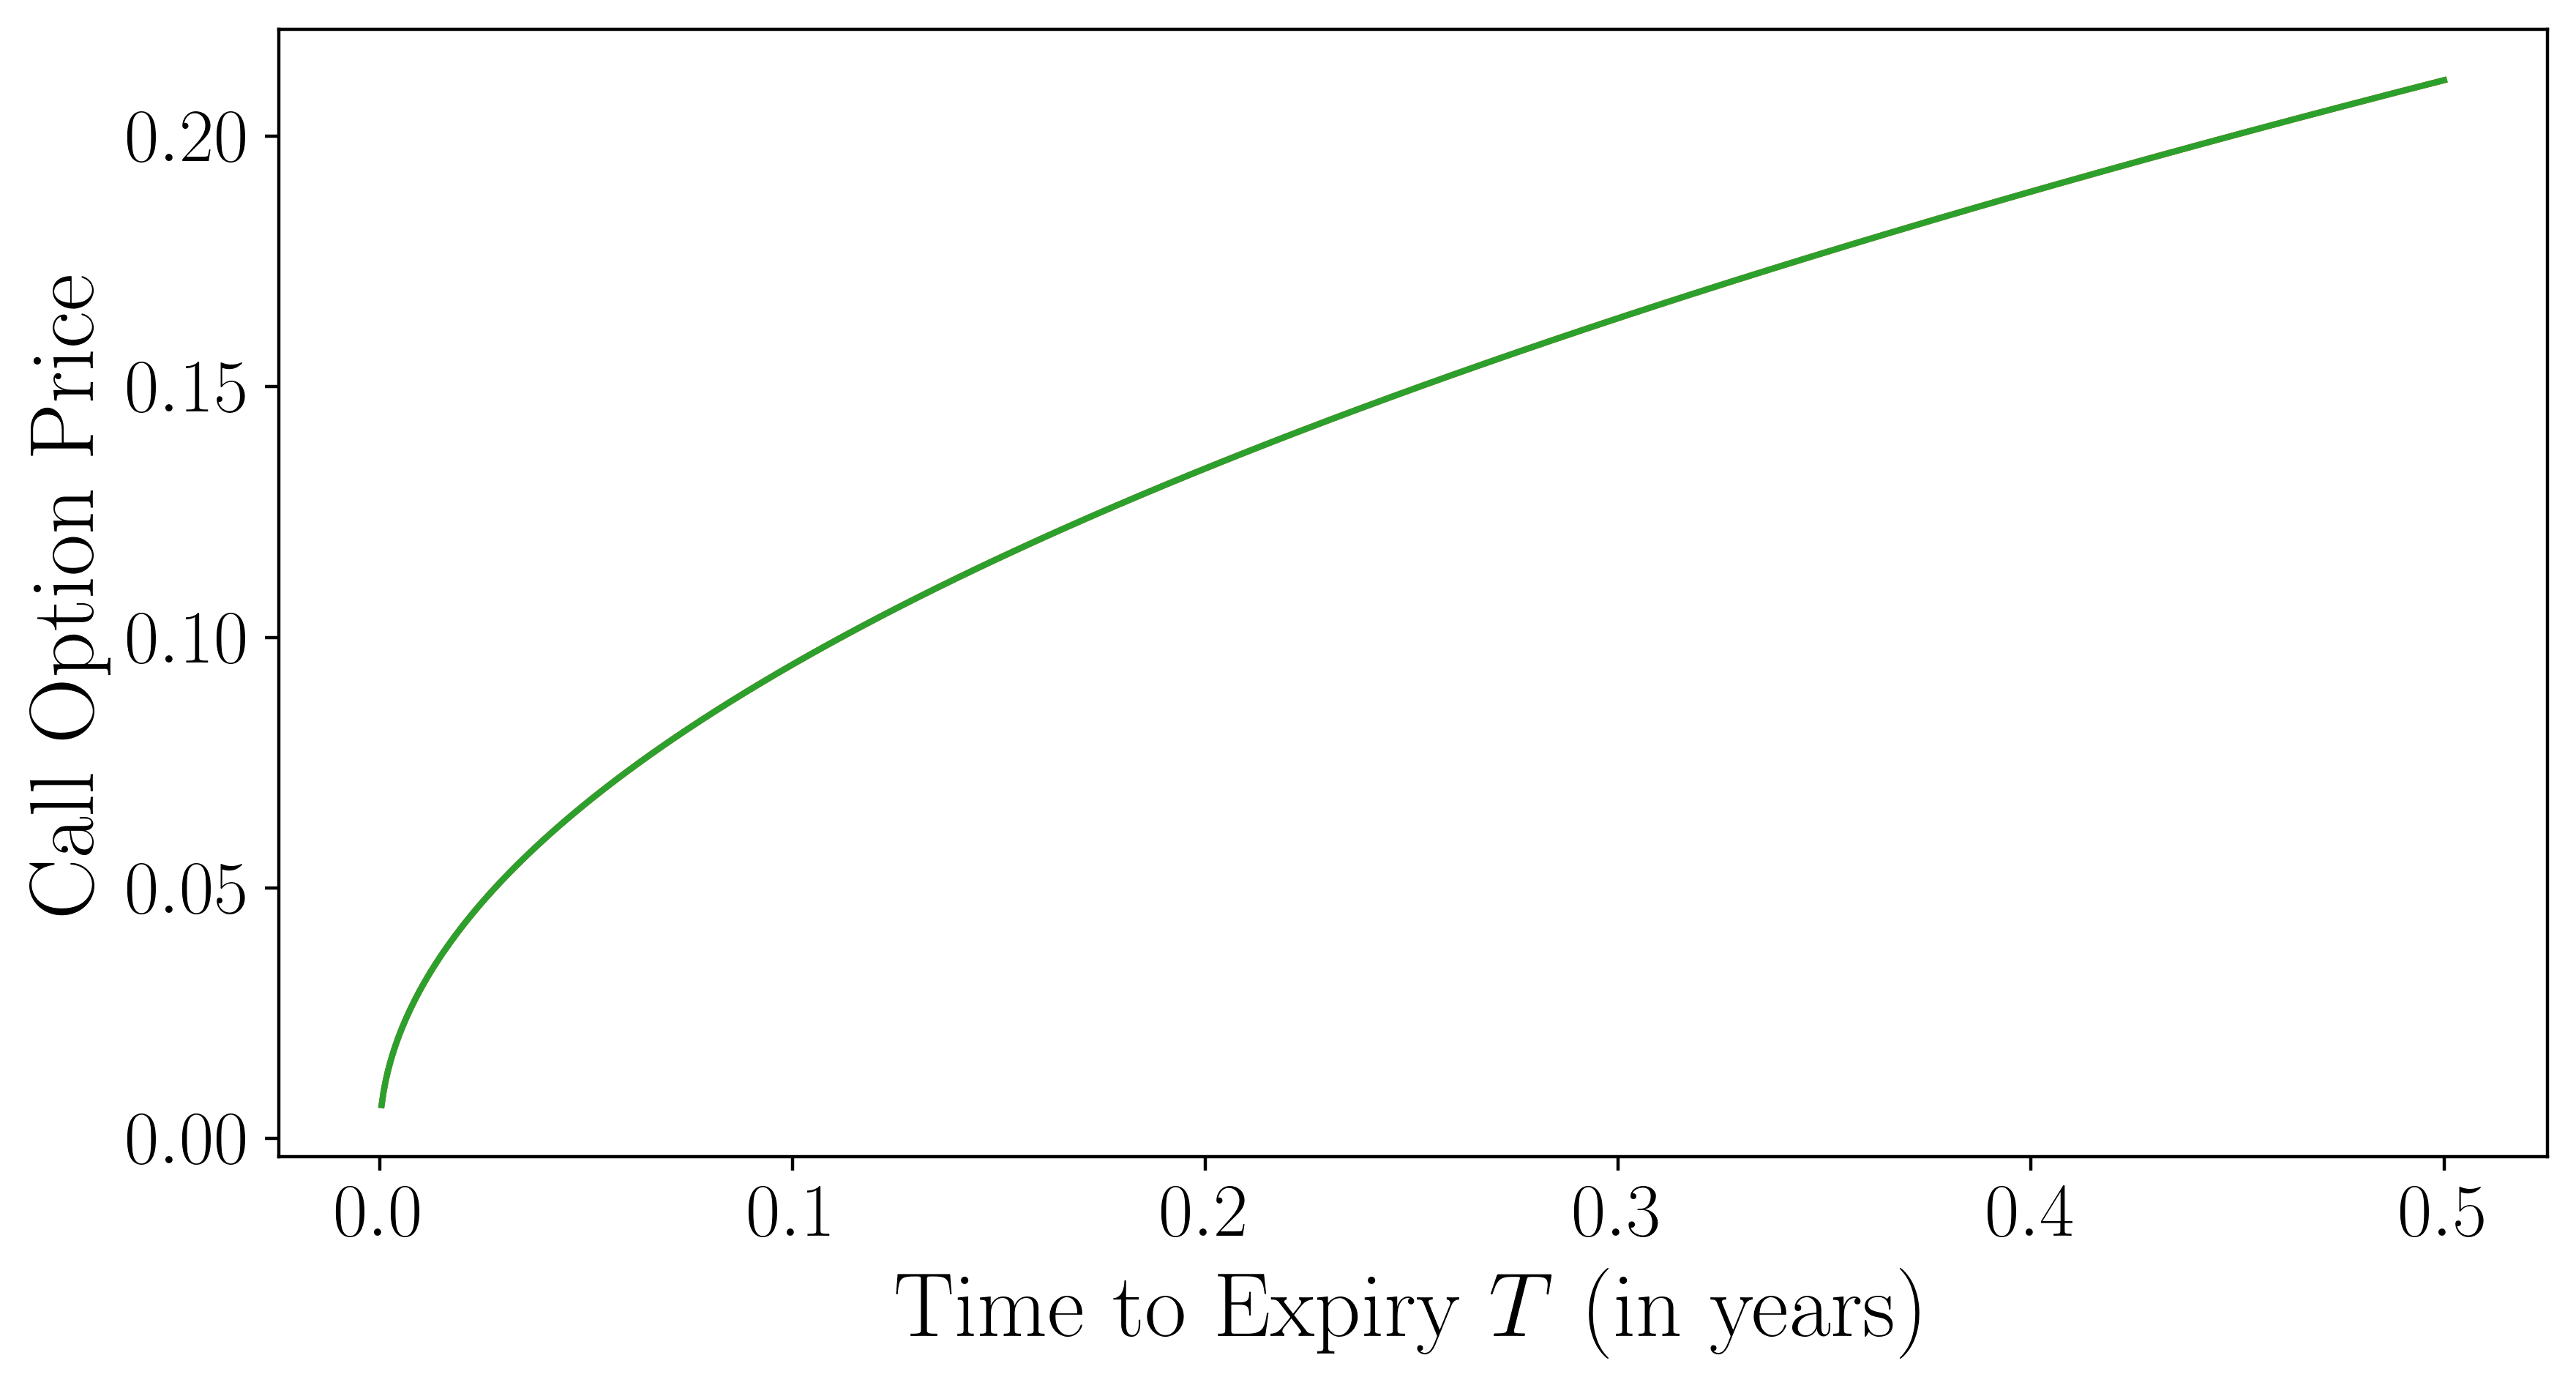

In [47]:
time_to_expiry = np.linspace(0,0.5,1000)
K = 2.5
Ss = [0.7*K, K, 1.45*K]
price_to_exp = [[black_scholes_call(s,K,0.0,t,0.3) for t in time_to_expiry] for s in Ss]
fig = plt.figure()
for s in range(len(Ss)):
    plt.plot(time_to_expiry, price_to_exp[1])
plt.xlabel('Time to Expiry $T$ (in years)')
plt.ylabel('Call Option Price')
plt.savefig("call_prices_time_to_expiry", bbox_inches='tight', pad_inches=0.01)
plt.show()